### **Merging Notebooks as one**
* #### **Installed the neccessary installer**

In [19]:
!pip install ipynb

In [4]:
### Merging other notebooks.

from ipynb.fs.full.MTN_CLEANED_DATA import *
from ipynb.fs.full.GTCO_CLEANED_DATA import *
from ipynb.fs.full.Dangote_Cleaned_Data import *
from ipynb.fs.full.Nestle_Data import *

            Date  Price   Open   High    Low     Vol. Change %
0     12/31/2024  200.0  207.8  200.9  200.0    1.80M   -3.75%
1     12/30/2024  207.8  194.0  207.8  207.8    3.13M    7.11%
2     12/27/2024  194.0  194.0  194.0  194.0    2.13M    0.00%
3     12/24/2024  194.0  178.0  194.0  194.0    1.58M    8.99%
4     12/23/2024  178.0  175.5  180.0  178.0    3.32M    1.42%
...          ...    ...    ...    ...    ...      ...      ...
1234    1/8/2020  109.5  107.6  109.5  108.0   11.95M    1.77%
1235    1/7/2020  107.6  108.0  107.6  107.6    3.41M   -0.37%
1236    1/6/2020  108.0  109.0  108.5  108.0    3.02M   -0.92%
1237    1/3/2020  109.0  109.0  109.0  109.0    4.09M    0.00%
1238    1/2/2020  109.0  105.0  109.0  109.0  380.73K    3.81%

[1239 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1239 non-null   obje

C:\Users\User\Documents\Anaconda Projects\GTCO_CLEANED_DATA.ipynb:51: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  "metadata": {},


            Date  Price   Open   High    Low     Vol. Change %
0     12/31/2024  478.8  478.8  478.8  478.8   18.28K    0.00%
1     12/30/2024  478.8  478.8  478.8  478.8  222.45K    0.00%
2     12/27/2024  478.8  478.8  478.8  478.8   42.38K    0.00%
3     12/24/2024  478.8  478.8  478.8  478.8   30.49K    0.00%
4     12/23/2024  478.8  478.8  478.8  478.8   57.98K    0.00%
...          ...    ...    ...    ...    ...      ...      ...
1234    1/8/2020  164.0  150.0  164.0  154.1    3.16M    9.33%
1235    1/7/2020  150.0  146.0  152.0  146.1    4.69M    2.74%
1236    1/6/2020  146.0  142.0  146.0  143.0    2.58M    2.82%
1237    1/3/2020  142.0  142.0  142.0  142.0    1.53M    0.00%
1238    1/2/2020  142.0  142.0  142.0  142.0    1.87M    0.00%

[1239 rows x 7 columns]
index type: datetime64[ns]
            Date     Price      Open High  Low     Vol. Change %
0     12/31/2024       875       875  875  875   13.06K    0.00%
1     12/30/2024       875       875  875  875   45.38K    0.0

### **CONVERTING DATA TYPES**
* **Had to set date as index because it duplicated to another column in the right datatype**
* **Another reason is to ensure consistency accross sectors**


In [17]:
### Coverting Date column to Date Data Type

nestle_df['Date']=pd.to_datetime(nestle_df['Date'])

In [18]:
### Setting date as index

nestle_df.set_index('Date', inplace=True)

In [19]:
### Removing Spaces(Trim) in columns

nestle_df.columns= nestle_df.columns.str.strip()

In [20]:
### Shows column name

nestle_df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [21]:
### Dropping the Change(%) column.

nestle_df= nestle_df.drop(columns=['Change %'])

In [22]:
### Calling my variables to see changes reflected.
nestle_df

,Price,Open,High,Low,Vol.
Date,,,,,
2024-12-31,875,875,875,875,13.06K
2024-12-30,875,875,875,875,45.38K
2024-12-27,875,875,875,875,27.86K
2024-12-24,875,875,875,875,10.90K
2024-12-23,875,875,875,875,22.31K
...,...,...,...,...,...
2020-01-08,"1,469.90","1,469.90",0,0,183.09K
2020-01-07,"1,469.90","1,469.90",0,0,266.83K
2020-01-06,"1,469.90","1,469.90",0,0,21.32K


In [23]:
### Checking my date index datatype

print("index type:",nestle_df.index.dtype)

index type: datetime64[ns]


In [25]:
### Convert columns: price,Open, High, Low to float data type

nestle_df['Price']=(nestle_df['Price'].astype(str).str.replace(r'[^\d.]','',regex=True).astype(float))                                                      
nestle_df['Open']=(nestle_df['Open'].astype(str).str.replace(r'[^\d.]','',regex=True).astype(float)) 
nestle_df['High']=(nestle_df['High'].astype(str).str.replace(r'[^\d.]','',regex=True).astype(float))
nestle_df['Low']=(nestle_df['Low'].astype(str).str.replace(r'[^\d.]','',regex=True).astype(float))

In [26]:
# Cleaning and converting the values in the Volume column


nestle_df['Vol.'] = nestle_df['Vol.'].astype(str).str.upper()  ### Convert Vol. column to string and uppercase everything


clean_volume = []                             # Create an empty list to hold the cleaned numbers


for val in nestle_df['Vol.']:                 #Loop through the values to clean them
    if 'K' in val:
        num = float(val.replace('K', ''))
        clean_volume.append(num * 1000)
    elif 'M' in val:
        num = float(val.replace('M', ''))
        clean_volume.append(num * 1000000)
    else:
        clean_volume.append(float(val))


nestle_df['Vol.'] = clean_volume                    # Assign the cleaned values back to the Vol. column


In [27]:
### To confirm updated data types

nestle_df.dtypes

Price    float64
Open     float64
High     float64
Low      float64
Vol.     float64
dtype: object

### **PREVIEWING ACROSS SECTORS**

In [11]:
GTCO_df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2024-11-29,52.95,53.00,52.95,51.70,3530000.0
2024-11-28,53.00,53.00,53.00,53.00,4030000.0
2024-11-27,53.00,53.00,53.00,52.50,28750000.0
2024-11-26,53.00,52.75,53.00,53.00,7270000.0
2024-11-25,52.75,54.60,54.50,52.75,4340000.0


In [12]:
MTN_df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2024-12-31,200.0,207.8,200.9,200.0,1800000.0
2024-12-30,207.8,194.0,207.8,207.8,3130000.0
2024-12-27,194.0,194.0,194.0,194.0,2130000.0
2024-12-24,194.0,178.0,194.0,194.0,1580000.0
2024-12-23,178.0,175.5,180.0,178.0,3320000.0


In [13]:
dangote_df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2024-12-31,478.8,478.8,478.8,478.8,18280.0
2024-12-30,478.8,478.8,478.8,478.8,222450.0
2024-12-27,478.8,478.8,478.8,478.8,42380.0
2024-12-24,478.8,478.8,478.8,478.8,30490.0
2024-12-23,478.8,478.8,478.8,478.8,57980.0


In [14]:
nestle_df.head()

,Price,Open,High,Low,Vol.
Date,,,,,
2024-12-31,875.0,875.0,875.0,875.0,13060.0
2024-12-30,875.0,875.0,875.0,875.0,45380.0
2024-12-27,875.0,875.0,875.0,875.0,27860.0
2024-12-24,875.0,875.0,875.0,875.0,10900.0
2024-12-23,875.0,875.0,875.0,875.0,22310.0


In [15]:
nestle_df.tail()

,Price,Open,High,Low,Vol.
Date,,,,,
2020-01-08,1469.9,1469.9,0.0,0.0,183090.0
2020-01-07,1469.9,1469.9,0.0,0.0,266830.0
2020-01-06,1469.9,1469.9,0.0,0.0,21320.0
2020-01-03,1469.9,1469.9,0.0,0.0,47490.0
2020-01-02,1469.9,1469.9,0.0,0.0,6940.0


In [16]:
GTCO_df.tail()

,Price,Open,High,Low,Vol.
Date,,,,,
2020-01-08,31.25,30.5,31.70,30.50,21690000.0
2020-01-07,30.50,31.0,31.05,30.50,17580000.0
2020-01-06,31.00,30.1,31.00,30.65,19030000.0
2020-01-03,30.10,29.2,30.10,29.20,17670000.0
2020-01-02,29.20,29.7,29.60,29.15,18900000.0


In [17]:
MTN_df.tail()

,Price,Open,High,Low,Vol.
Date,,,,,
2020-01-08,109.5,107.6,109.5,108.0,11950000.0
2020-01-07,107.6,108.0,107.6,107.6,3410000.0
2020-01-06,108.0,109.0,108.5,108.0,3020000.0
2020-01-03,109.0,109.0,109.0,109.0,4090000.0
2020-01-02,109.0,105.0,109.0,109.0,380730.0


In [18]:
dangote_df.tail()

,Price,Open,High,Low,Vol.
Date,,,,,
2020-01-08,164.0,150.0,164.0,154.1,3160000.0
2020-01-07,150.0,146.0,152.0,146.1,4690000.0
2020-01-06,146.0,142.0,146.0,143.0,2580000.0
2020-01-03,142.0,142.0,142.0,142.0,1530000.0
2020-01-02,142.0,142.0,142.0,142.0,1870000.0


### **Already set date column to index in the individual (sector) notebooks**
* ####  **Sorting index across sectors**

In [20]:
### Sorting data by date across sectors

nestle_df=nestle_df.sort_index()
nestle_df

,Price,Open,High,Low,Vol.
Date,,,,,
2020-01-02,1469.9,1469.9,0.0,0.0,6940.0
2020-01-03,1469.9,1469.9,0.0,0.0,47490.0
2020-01-06,1469.9,1469.9,0.0,0.0,21320.0
2020-01-07,1469.9,1469.9,0.0,0.0,266830.0
2020-01-08,1469.9,1469.9,0.0,0.0,183090.0
...,...,...,...,...,...
2024-12-23,875.0,875.0,875.0,875.0,22310.0
2024-12-24,875.0,875.0,875.0,875.0,10900.0
2024-12-27,875.0,875.0,875.0,875.0,27860.0


In [21]:
GTCO_df=GTCO_df.sort_index()
GTCO_df

,Price,Open,High,Low,Vol.
Date,,,,,
2020-01-02,29.20,29.70,29.60,29.15,18900000.0
2020-01-03,30.10,29.20,30.10,29.20,17670000.0
2020-01-06,31.00,30.10,31.00,30.65,19030000.0
2020-01-07,30.50,31.00,31.05,30.50,17580000.0
2020-01-08,31.25,30.50,31.70,30.50,21690000.0
...,...,...,...,...,...
2024-11-25,52.75,54.60,54.50,52.75,4340000.0
2024-11-26,53.00,52.75,53.00,53.00,7270000.0
2024-11-27,53.00,53.00,53.00,52.50,28750000.0


In [22]:
MTN_df=MTN_df.sort_index()
MTN_df

,Price,Open,High,Low,Vol.
Date,,,,,
2020-01-02,109.0,105.0,109.0,109.0,380730.0
2020-01-03,109.0,109.0,109.0,109.0,4090000.0
2020-01-06,108.0,109.0,108.5,108.0,3020000.0
2020-01-07,107.6,108.0,107.6,107.6,3410000.0
2020-01-08,109.5,107.6,109.5,108.0,11950000.0
...,...,...,...,...,...
2024-12-23,178.0,175.5,180.0,178.0,3320000.0
2024-12-24,194.0,178.0,194.0,194.0,1580000.0
2024-12-27,194.0,194.0,194.0,194.0,2130000.0


In [23]:
dangote_df=dangote_df.sort_index()
dangote_df

,Price,Open,High,Low,Vol.
Date,,,,,
2020-01-02,142.0,142.0,142.0,142.0,1870000.0
2020-01-03,142.0,142.0,142.0,142.0,1530000.0
2020-01-06,146.0,142.0,146.0,143.0,2580000.0
2020-01-07,150.0,146.0,152.0,146.1,4690000.0
2020-01-08,164.0,150.0,164.0,154.1,3160000.0
...,...,...,...,...,...
2024-12-23,478.8,478.8,478.8,478.8,57980.0
2024-12-24,478.8,478.8,478.8,478.8,30490.0
2024-12-27,478.8,478.8,478.8,478.8,42380.0


### **CALCULATING KEY METRICS**

In [35]:
### Calculating percentage change in price daily across sectors

nestle_df['Change(%)']=nestle_df['Price'].pct_change()*100
nestle_df['Change(%)']=nestle_df['Change(%)'].round(2)

GTCO_df['Change(%)']=GTCO_df['Price'].pct_change()*100
GTCO_df['Change(%)']=GTCO_df['Change(%)'].round(2)

MTN_df['Change(%)']=MTN_df['Price'].pct_change()*100
MTN_df['Change(%)']=MTN_df['Change(%)'].round(2)

dangote_df['Change(%)']=dangote_df['Price'].pct_change()*100
dangote_df['Change(%)']=dangote_df['Change(%)'].round(2)

In [36]:
### Calculating Daily returns(%) across sectors

nestle_df['Daily Return(%)']=nestle_df['Price'].pct_change() * 100
GTCO_df['Daily Return(%)']=GTCO_df['Price'].pct_change() * 100
MTN_df['Daily Return(%)']=MTN_df['Price'].pct_change() * 100
dangote_df['Daily Return(%)']=dangote_df['Price'].pct_change() * 100

In [37]:
### Calculating Cumulative returns across sectors

nestle_df['Cumulative Return(%)']=(1 + nestle_df['Daily Return(%)'] / 100).cumprod() * 100 -100

GTCO_df['Cumulative Return(%)']=(1 + GTCO_df['Daily Return(%)'] / 100).cumprod() * 100 -100

MTN_df['Cumulative Return(%)']=(1 + MTN_df['Daily Return(%)'] / 100).cumprod() * 100 -100

dangote_df['Cumulative Return(%)']=(1 + dangote_df['Daily Return(%)'] / 100).cumprod() * 100 -100 


In [38]:
### Calculating Moving averages across sectors

nestle_df['20-Day Moving Average']=nestle_df['Price'].rolling(window=20).mean()
nestle_df['50-Day Moving Average']=nestle_df['Price'].rolling(window=50).mean()
nestle_df['100-Day Moving Average']=nestle_df['Price'].rolling(window=100).mean()

GTCO_df['20-Day Moving Average']=GTCO_df['Price'].rolling(window=20).mean()
GTCO_df['50-Day Moving Average']=GTCO_df['Price'].rolling(window=50).mean()
GTCO_df['100-Day Moving Average']=GTCO_df['Price'].rolling(window=100).mean()

MTN_df['20-Day Moving Average']=MTN_df['Price'].rolling(window=20).mean()
MTN_df['50-Day Moving Average']=MTN_df['Price'].rolling(window=50).mean()
MTN_df['100-Day Moving Average']=MTN_df['Price'].rolling(window=100).mean()

dangote_df['20-Day Moving Average']=dangote_df['Price'].rolling(window=20).mean()
dangote_df['50-Day Moving Average']=dangote_df['Price'].rolling(window=50).mean()
dangote_df['100-Day Moving Average']=dangote_df['Price'].rolling(window=100).mean()

In [39]:
### Calculating Volatility across sectors

nestle_df['20-Day Volatility']=nestle_df['Daily Return(%)'].rolling(window=20).std().round(2)
nestle_df['50-Day Volatility']=nestle_df['Daily Return(%)'].rolling(window=50).std().round(2)
nestle_df['100-Day Volatility']=nestle_df['Daily Return(%)'].rolling(window=100).std().round(2)

GTCO_df['20-Day Volatility']=GTCO_df['Daily Return(%)'].rolling(window=20).std().round(2)
GTCO_df['50-Day Volatility']=GTCO_df['Daily Return(%)'].rolling(window=50).std().round(2)
GTCO_df['100-Day Volatility']=GTCO_df['Daily Return(%)'].rolling(window=100).std().round(2)

MTN_df['20-Day Volatility']=MTN_df['Daily Return(%)'].rolling(window=20).std().round(2)
MTN_df['50-Day Volatility']=MTN_df['Daily Return(%)'].rolling(window=50).std().round(2)
MTN_df['100-Day Volatility']=MTN_df['Daily Return(%)'].rolling(window=100).std().round(2)

dangote_df['20-Day Volatility']=dangote_df['Daily Return(%)'].rolling(window=20).std().round(2)
dangote_df['50-Day Volatility']=dangote_df['Daily Return(%)'].rolling(window=50).std().round(2)
dangote_df['100-Day Volatility']=dangote_df['Daily Return(%)'].rolling(window=100).std().round(2)

### **Previewing the first and last five rows across sectors**
* #### **This is to check if all calculated metrics are reflected in order**
* #### **Noticed there are lots of NaNs and infs**

In [40]:
nestle_df.head()

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return(%),20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility
Date,,,,,,,,,,,,,,
2020-01-02,1469.9,1469.9,0.0,0.0,6940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1469.9,1469.9,0.0,0.0,47490.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,1469.9,1469.9,0.0,0.0,21320.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,1469.9,1469.9,0.0,0.0,266830.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1469.9,1469.9,0.0,0.0,183090.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
nestle_df.tail()

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return(%),20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility
Date,,,,,,,,,,,,,,
2024-12-23,875.0,875.0,875.0,875.0,22310.0,0.0,0.0,-40.472141,857.25,866.1,854.95,0.46,0.76,1.15
2024-12-24,875.0,875.0,875.0,875.0,10900.0,0.0,0.0,-40.472141,858.50,865.8,855.40,0.46,0.76,1.15
2024-12-27,875.0,875.0,875.0,875.0,27860.0,0.0,0.0,-40.472141,859.75,865.9,855.85,0.46,0.69,1.15
2024-12-30,875.0,875.0,875.0,875.0,45380.0,0.0,0.0,-40.472141,861.00,866.0,856.30,0.46,0.69,1.15
2024-12-31,875.0,875.0,875.0,875.0,13060.0,0.0,0.0,-40.472141,862.25,866.1,856.90,0.46,0.69,1.13


In [42]:
GTCO_df.head()

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return(%),20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility
Date,,,,,,,,,,,,,,
2020-01-02,29.20,29.7,29.60,29.15,18900000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,30.10,29.2,30.10,29.20,17670000.0,3.08,3.082192,3.082192,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,31.00,30.1,31.00,30.65,19030000.0,2.99,2.990033,6.164384,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,30.50,31.0,31.05,30.50,17580000.0,-1.61,-1.612903,4.452055,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,31.25,30.5,31.70,30.50,21690000.0,2.46,2.459016,7.020548,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
GTCO_df.tail()

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return(%),20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility
Date,,,,,,,,,,,,,,
2024-11-25,52.75,54.60,54.50,52.75,4340000.0,-3.39,-3.388278,80.650685,54.2750,51.059,48.2220,1.94,1.85,1.47
2024-11-26,53.00,52.75,53.00,53.00,7270000.0,0.47,0.473934,81.506849,54.3950,51.199,48.2785,1.93,1.85,1.47
2024-11-27,53.00,53.00,53.00,52.50,28750000.0,0.00,0.000000,81.506849,54.3800,51.321,48.3335,1.52,1.83,1.47
2024-11-28,53.00,53.00,53.00,53.00,4030000.0,0.00,0.000000,81.506849,54.3450,51.453,48.4085,1.51,1.82,1.40
2024-11-29,52.95,53.00,52.95,51.70,3530000.0,-0.09,-0.094340,81.335616,54.2275,51.587,48.4870,1.33,1.82,1.40


In [44]:
MTN_df.head()

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return(%),20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility
Date,,,,,,,,,,,,,,
2020-01-02,109.0,105.0,109.0,109.0,380730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,109.0,109.0,109.0,109.0,4090000.0,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,108.0,109.0,108.5,108.0,3020000.0,-0.92,-0.917431,-0.917431,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,107.6,108.0,107.6,107.6,3410000.0,-0.37,-0.370370,-1.284404,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,109.5,107.6,109.5,108.0,11950000.0,1.77,1.765799,0.458716,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
MTN_df.tail()

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return(%),20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility
Date,,,,,,,,,,,,,,
2024-12-23,178.0,175.5,180.0,178.0,3320000.0,1.42,1.424501,63.302752,172.91,175.612,183.620,0.89,1.06,1.89
2024-12-24,194.0,178.0,194.0,194.0,1580000.0,8.99,8.988764,77.981651,174.11,175.672,183.660,2.13,1.67,2.10
2024-12-27,194.0,194.0,194.0,194.0,2130000.0,0.00,0.000000,77.981651,175.31,175.732,183.813,2.13,1.67,2.01
2024-12-30,207.8,194.0,207.8,207.8,3130000.0,7.11,7.113402,90.642202,177.20,176.068,184.096,2.56,1.95,2.13
2024-12-31,200.0,207.8,200.9,200.0,1800000.0,-3.75,-3.753609,83.486239,178.70,176.248,184.296,2.77,2.03,2.16


In [46]:
dangote_df.head()

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return(%),20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility
Date,,,,,,,,,,,,,,
2020-01-02,142.0,142.0,142.0,142.0,1870000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,142.0,142.0,142.0,142.0,1530000.0,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,146.0,142.0,146.0,143.0,2580000.0,2.82,2.816901,2.816901,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,150.0,146.0,152.0,146.1,4690000.0,2.74,2.739726,5.633803,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,164.0,150.0,164.0,154.1,3160000.0,9.33,9.333333,15.492958,NaN,NaN,NaN,NaN,NaN,NaN


 ### **Checking to see the exact rows that contain null values.** 

In [51]:
nestle_df[nestle_df.isnull().any(axis=1)]

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return(%),20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility
Date,,,,,,,,,,,,,,
2020-01-02,1469.9,1469.9,0.0,0.0,6940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1469.9,1469.9,0.0,0.0,47490.0,0.0,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,1469.9,1469.9,0.0,0.0,21320.0,0.0,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,1469.9,1469.9,0.0,0.0,266830.0,0.0,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1469.9,1469.9,0.0,0.0,183090.0,0.0,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-19,995.0,995.0,1069.7,997.5,139500.0,0.0,0.0,-32.30832,969.04,902.680,NaN,2.54,3.37,NaN
2020-05-20,995.0,995.0,1094.5,1030.1,201210.0,0.0,0.0,-32.30832,970.04,902.240,NaN,2.54,3.37,NaN
2020-05-21,995.0,995.0,1094.5,1055.0,9820.0,0.0,0.0,-32.30832,971.04,901.800,NaN,2.54,3.37,NaN


In [52]:
MTN_df[MTN_df.isnull().any(axis=1)]

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return(%),20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility
Date,,,,,,,,,,,,,,
2020-01-02,109.0,105.0,109.0,109.0,380730.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,109.0,109.0,109.0,109.0,4090000.0,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,108.0,109.0,108.5,108.0,3020000.0,-0.92,-0.917431,-0.917431,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,107.6,108.0,107.6,107.6,3410000.0,-0.37,-0.370370,-1.284404,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,109.5,107.6,109.5,108.0,11950000.0,1.77,1.765799,0.458716,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-19,111.0,111.0,115.0,110.0,842900.0,0.00,0.000000,1.834862,109.815,103.196,NaN,2.38,3.82,NaN
2020-05-20,111.0,111.0,114.0,111.5,1330000.0,0.00,0.000000,1.834862,110.365,103.116,NaN,2.38,3.82,NaN
2020-05-21,111.0,111.0,115.0,113.1,283790.0,0.00,0.000000,1.834862,110.915,103.036,NaN,2.38,3.82,NaN


In [53]:
dangote_df[dangote_df.isnull().any(axis=1)]

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return(%),20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility
Date,,,,,,,,,,,,,,
2020-01-02,142.0,142.0,142.0,142.0,1870000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,142.0,142.0,142.0,142.0,1530000.0,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,146.0,142.0,146.0,143.0,2580000.0,2.82,2.816901,2.816901,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,150.0,146.0,152.0,146.1,4690000.0,2.74,2.739726,5.633803,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,164.0,150.0,164.0,154.1,3160000.0,9.33,9.333333,15.492958,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-19,147.5,143.5,147.5,147.0,3940000.0,2.79,2.787456,3.873239,139.390,136.956,NaN,2.90,3.90,NaN
2020-05-20,150.0,147.5,150.0,150.0,6480000.0,1.69,1.694915,5.633803,140.090,136.556,NaN,2.91,3.91,NaN
2020-05-21,150.0,150.0,150.0,150.0,1590000.0,0.00,0.000000,5.633803,140.790,136.156,NaN,2.91,3.91,NaN


### **Tackling NaN and Infs** 
* #### **Displays all rows where at least one column contains Inf**

In [55]:
### Importing the neccessary library 

import numpy as np

In [56]:
### Checking if there's any inf value in the columns

nestle_df[np.isinf(nestle_df['Cumulative Return(%)'])].any()

Price                     False
Open                      False
High                      False
Low                       False
Vol.                      False
Change(%)                 False
Daily Return(%)           False
Cumulative Return(%)      False
20-Day Moving Average     False
50-Day Moving Average     False
100-Day Moving Average    False
20-Day Volatility         False
50-Day Volatility         False
100-Day Volatility        False
dtype: bool

In [57]:
GTCO_df[np.isinf(GTCO_df['Cumulative Return(%)'])].any()

Price                     False
Open                      False
High                      False
Low                       False
Vol.                      False
Change(%)                 False
Daily Return(%)           False
Cumulative Return(%)      False
20-Day Moving Average     False
50-Day Moving Average     False
100-Day Moving Average    False
20-Day Volatility         False
50-Day Volatility         False
100-Day Volatility        False
dtype: bool

In [58]:
MTN_df[np.isinf(MTN_df['Cumulative Return(%)'])].any()

Price                     False
Open                      False
High                      False
Low                       False
Vol.                      False
Change(%)                 False
Daily Return(%)           False
Cumulative Return(%)      False
20-Day Moving Average     False
50-Day Moving Average     False
100-Day Moving Average    False
20-Day Volatility         False
50-Day Volatility         False
100-Day Volatility        False
dtype: bool

In [59]:
dangote_df[np.isinf(dangote_df['Cumulative Return(%)'])].any()

Price                     False
Open                      False
High                      False
Low                       False
Vol.                      False
Change(%)                 False
Daily Return(%)           False
Cumulative Return(%)      False
20-Day Moving Average     False
50-Day Moving Average     False
100-Day Moving Average    False
20-Day Volatility         False
50-Day Volatility         False
100-Day Volatility        False
dtype: bool

### **Final Cleaning before visualizing**
* #### **Replacing Infs with NaN**

In [61]:
### Final Cleaning
### Replacing rows containing inf values to NaN

nestle_df.replace([np.inf,-np.inf],np.NaN, inplace=True)
GTCO_df.replace([np.inf,-np.inf],np.NaN, inplace=True)
MTN_df.replace([np.inf,-np.inf],np.NaN, inplace=True)
dangote_df.replace([np.inf,-np.inf],np.NaN, inplace=True)

In [62]:
### Checking if inf still exists in my column accross sectors

np.isinf(nestle_df).any().any()

False

In [63]:
np.isinf(GTCO_df).any().any()

False

In [64]:
np.isinf(MTN_df).any().any()

False

In [65]:
np.isinf(dangote_df).any().any()

False

In [77]:
### Creating a list to hold all my important metrics

metrics=['Daily Return(%)', 'Cumulative Return', '20-Day Moving Average','50-Day Moving Average','100-Day Moving Average',
         '20-Day Volatility','50-Day Volatility','100-Day Volatility']

In [78]:
### Dropping rows with NaN in my metrics

nestle_df.dropna(subset=metrics,inplace=True)
GTCO_df.dropna(subset=metrics,inplace=True)
MTN_df.dropna(subset=metrics,inplace=True)
dangote_df.dropna(subset=metrics,inplace=True)

In [83]:
### Saving final cleaned data for each sector

nestle_df.to_csv('Final_Nestle_Cleaned_Data.csv',index=False)
GTCO_df.to_csv('Final_GTCO_Cleaned_Data.csv',index=False)
MTN_df.to_csv('Final_MTN_Cleaned_Data.csv',index=False)
dangote_df.to_csv('Final_dangote_Cleaned_Data.csv',index=False)

### While carrying out visuals, we noticed clusters in some sectors at a particular a particular date

 * **The visuals was to check the daily returns accross sectors, further fidings revealed that we lost a huge chunk of data while dropping columns**
 *   **This led to checking and counting the rows before and after analysis**
 *   **Used before cleaning and after cleaning **LEN** to count**

In [1]:
print("Before cleaning:", len(nestle_df))

NameError: name 'nestle_df' is not defined

In [ ]:
print("After cleaning:", len('Final_Nestle_Cleaned_Data.csv'))

In [ ]:
print("Before cleaning:", len(MTN_df))

In [ ]:
print("After cleaning:",len('Final_MTN_Cleaned_Data.csv'))

In [ ]:
print("Before cleaning:", len(GTCO_df))

In [ ]:
print("After cleaning:",len('Final_GTCO_Cleaned_Data.csv'))

In [ ]:
print("Before cleaning:", len(dangote_df))

In [ ]:
print("After cleaning:", len('Final_dangote_Cleaned_Data.csv'))

In [192]:
dangote_df.tail()

,Price,Open,High,Low,Vol.,Change(%),Daily Return(%),Cumulative Return,20-Day Moving Average,50-Day Moving Average,100-Day Moving Average,20-Day Volatility,50-Day Volatility,100-Day Volatility,Cumulative Return(%)
Date,,,,,,,,,,,,,,,
2024-12-23,478.8,478.8,478.8,478.8,57980.0,0.0,0.0,NaN,478.8,478.8,507.645,0.0,0.0,1.41,NaN
2024-12-24,478.8,478.8,478.8,478.8,30490.0,0.0,0.0,NaN,478.8,478.8,506.522,0.0,0.0,1.41,NaN
2024-12-27,478.8,478.8,478.8,478.8,42380.0,0.0,0.0,NaN,478.8,478.8,505.399,0.0,0.0,1.41,NaN
2024-12-30,478.8,478.8,478.8,478.8,222450.0,0.0,0.0,NaN,478.8,478.8,504.276,0.0,0.0,1.41,NaN
2024-12-31,478.8,478.8,478.8,478.8,18280.0,0.0,0.0,NaN,478.8,478.8,503.153,0.0,0.0,1.41,NaN


## **Visualization** 

In [67]:
### Importing the needed libraries for visualization

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.figure

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

## **CONSUMER GOODS (NESTLE)**

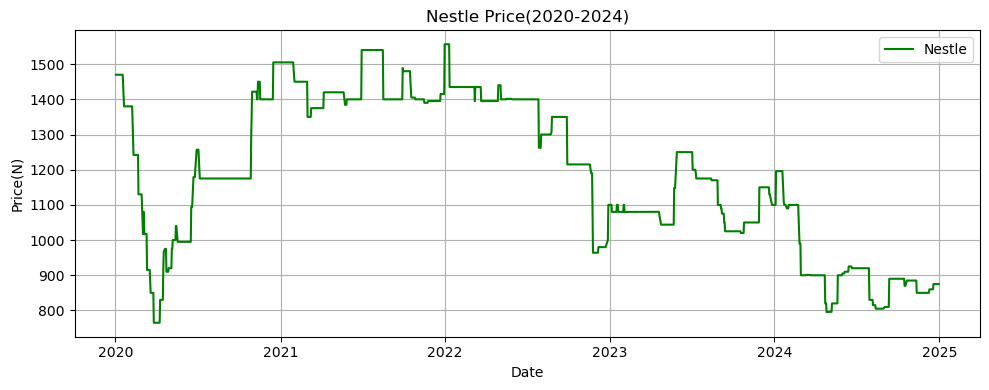

In [69]:
plt.figure(figsize=(10, 4))
plt.plot(nestle_df['Price'], label='Nestle', color='Green', ls='-')
plt.title('Nestle Price(2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price(N)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("Nestle_Price_(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

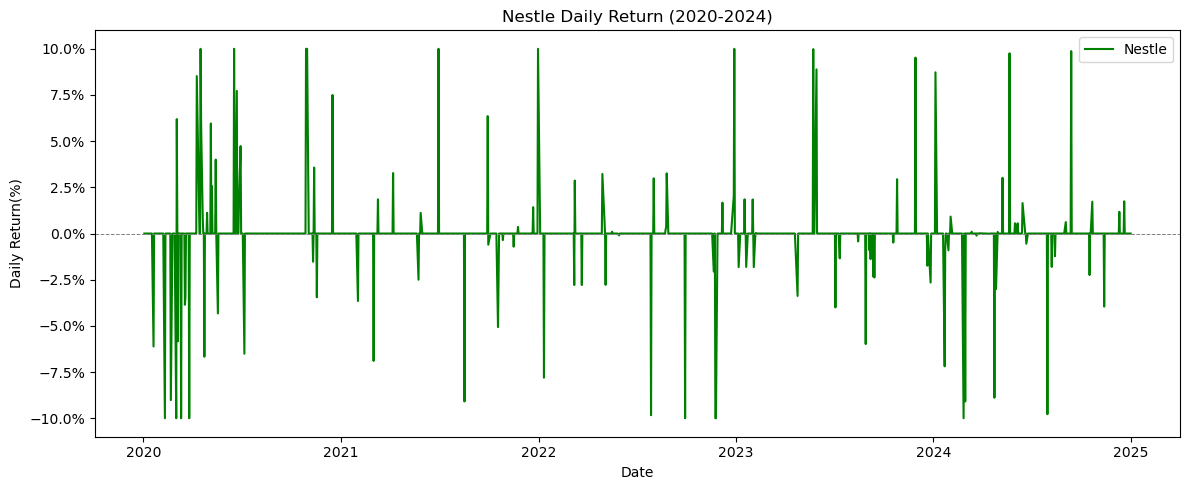

In [70]:
plt.figure(figsize=(12, 5))
plt.plot(nestle_df['Daily Return(%)'].dropna(), label='Nestle', color='Green')
plt.axhline(0,color='Gray',ls='--',lw=0.7)
plt.title('Nestle Daily Return (2020-2024)')
plt.xlabel('Date')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Daily Return(%)')
plt.legend()
plt.tight_layout()
plt.savefig("Nestle_Daily_Return(%)(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()



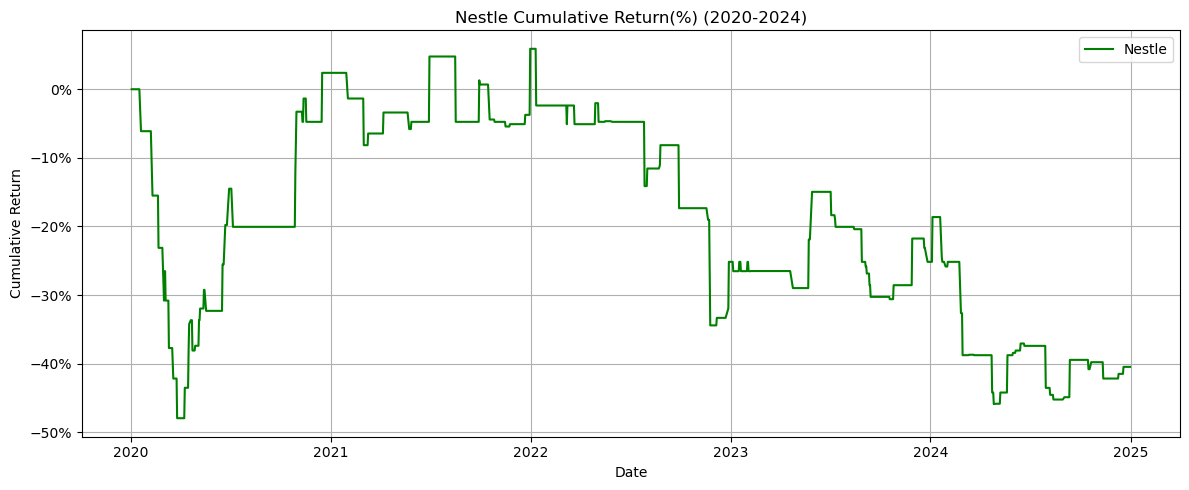

In [71]:
plt.figure(figsize=(12, 5))
plt.plot(nestle_df['Cumulative Return(%)'].dropna(), label='Nestle', color='Green')
plt.title('Nestle Cumulative Return(%) (2020-2024)')
plt.xlabel('Date')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("Nestle_Cumulative_Return(%)(2020_2024).png", dpi=300, bbox_inches='tight')
plt.show()

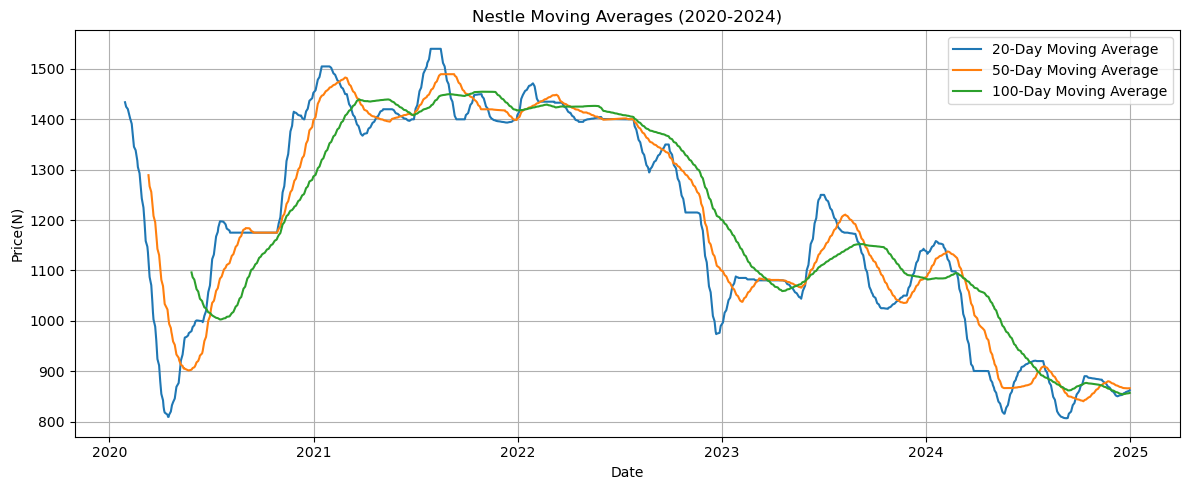

In [72]:
plt.figure(figsize=(12, 5))
plt.plot(nestle_df['20-Day Moving Average'].dropna(),label='20-Day Moving Average')
plt.plot(nestle_df['50-Day Moving Average'].dropna(),label='50-Day Moving Average')
plt.plot(nestle_df['100-Day Moving Average'].dropna(),label='100-Day Moving Average')
plt.title('Nestle Moving Averages (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price(N)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Nestle_Moving_Averages(2020_2024).png", dpi=300, bbox_inches='tight')
plt.show()


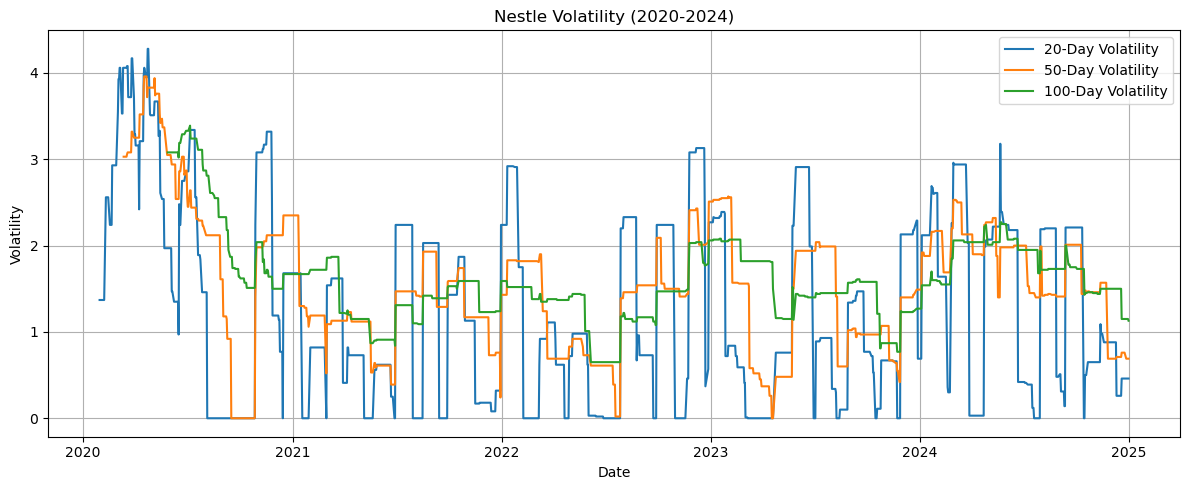

In [74]:
plt.figure(figsize=(12, 5))
plt.plot(nestle_df['20-Day Volatility'].dropna(),label='20-Day Volatility')
plt.plot(nestle_df['50-Day Volatility'].dropna(),label='50-Day Volatility')
plt.plot(nestle_df['100-Day Volatility'].dropna(),label='100-Day Volatility')
plt.title('Nestle Volatility (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Nestle_Volatility(2020_2024).png", dpi=300, bbox_inches='tight')
plt.show()

### **FINANCIAL SECTOR (GTCO)**

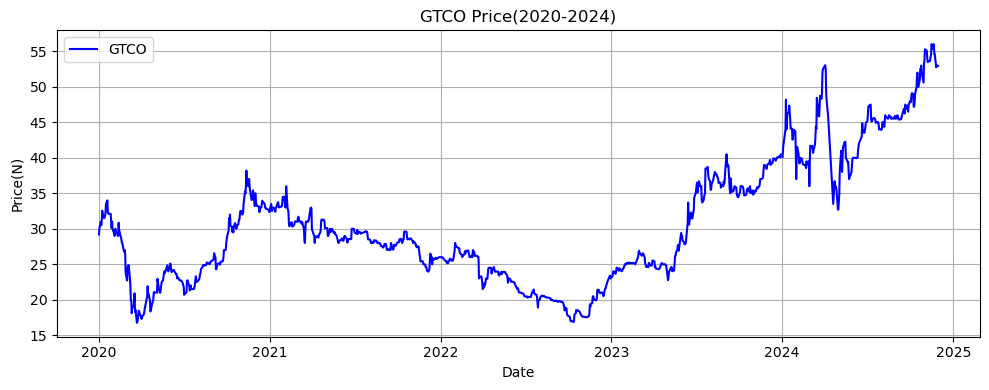

In [75]:
plt.figure(figsize=(10, 4))
plt.plot(GTCO_df['Price'], label='GTCO', color='blue', ls='-')
plt.title('GTCO Price(2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price(N)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("GTCO_Price(2020_2024).png", dpi=300, bbox_inches='tight')
plt.show()


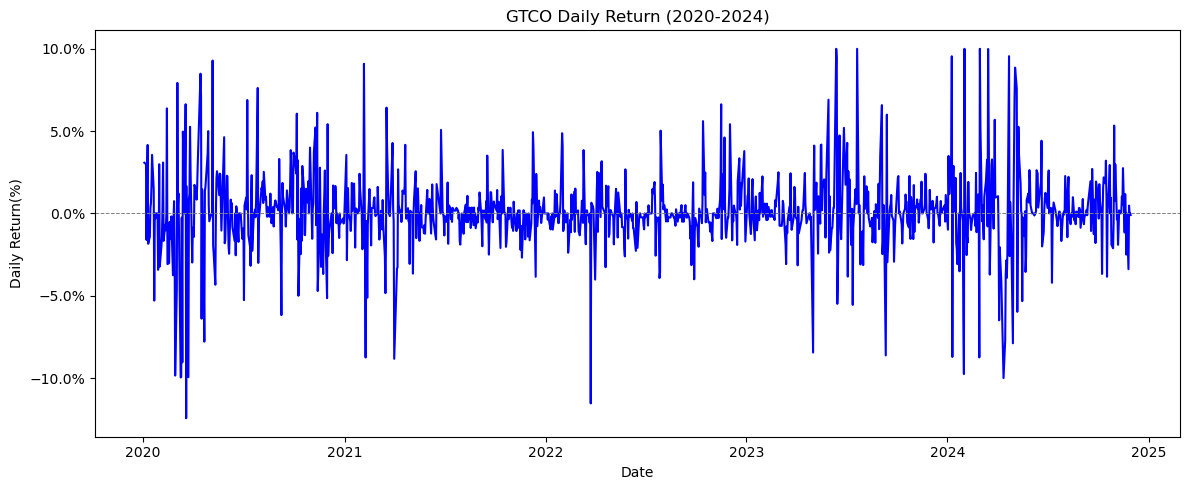

In [76]:
plt.figure(figsize=(12, 5))
plt.plot(GTCO_df['Daily Return(%)'].dropna(), label='GTCO', color='Blue')
plt.axhline(0,color='Gray',ls='--',lw=0.7)
plt.title('GTCO Daily Return (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Daily Return(%)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.savefig("GTCO_Daily_Return(%)(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

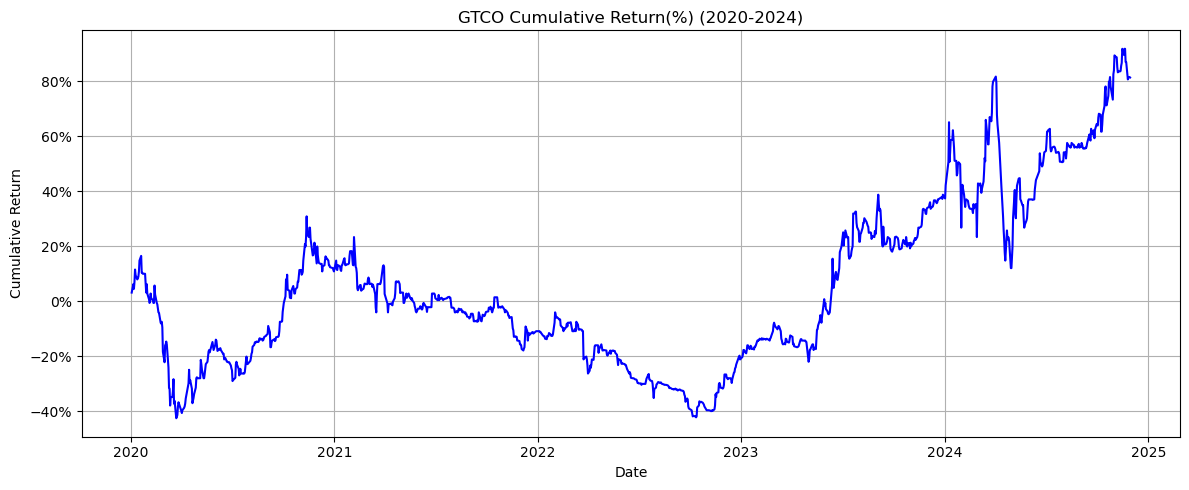

In [77]:
plt.figure(figsize=(12, 5))
plt.plot(GTCO_df['Cumulative Return(%)'].dropna(), label='GTCO', color='blue')
plt.title('GTCO Cumulative Return(%) (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid()
plt.tight_layout()
plt.savefig("Cumulative_Return(%)(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

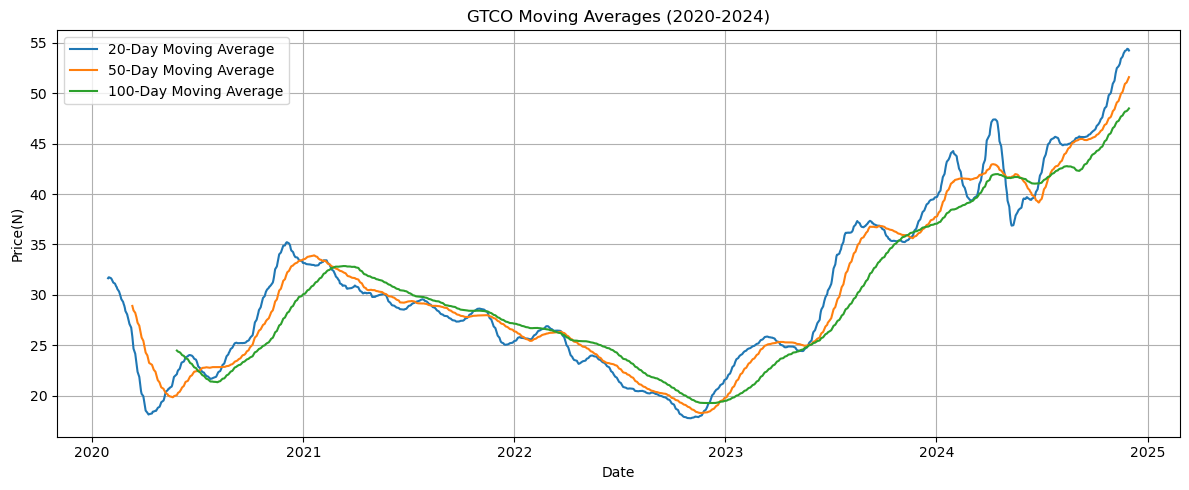

In [78]:
plt.figure(figsize=(12, 5))
plt.plot(GTCO_df['20-Day Moving Average'].dropna(),label='20-Day Moving Average')
plt.plot(GTCO_df['50-Day Moving Average'].dropna(),label='50-Day Moving Average')
plt.plot(GTCO_df['100-Day Moving Average'].dropna(),label='100-Day Moving Average')
plt.title('GTCO Moving Averages (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price(N)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("GTCO_Moving_Averages(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

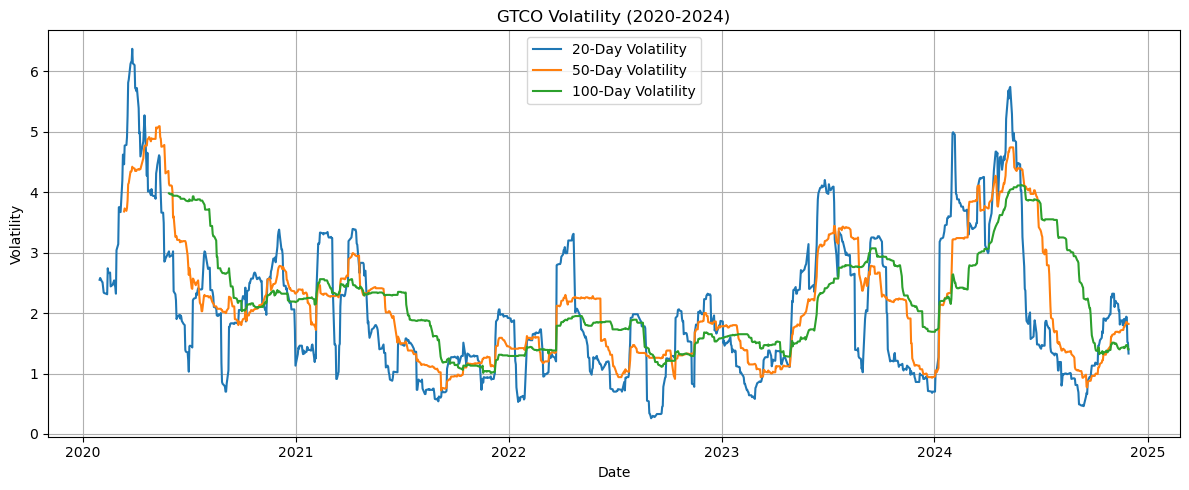

In [79]:
plt.figure(figsize=(12, 5))
plt.plot(GTCO_df['20-Day Volatility'].dropna(),label='20-Day Volatility')
plt.plot(GTCO_df['50-Day Volatility'].dropna(),label='50-Day Volatility')
plt.plot(GTCO_df['100-Day Volatility'].dropna(),label='100-Day Volatility')
plt.title('GTCO Volatility (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("GTCO_Volatility(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

### **TELECOMMUNICATIONS SECTOR (MTN)**

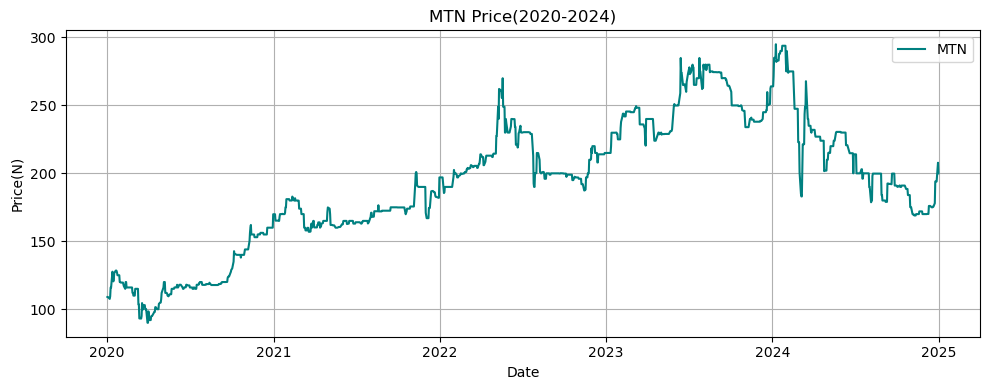

In [80]:
plt.figure(figsize=(10, 4))
plt.plot(MTN_df['Price'], label='MTN', color='Teal', ls='-')
plt.title('MTN Price(2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price(N)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("MTN_Price(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

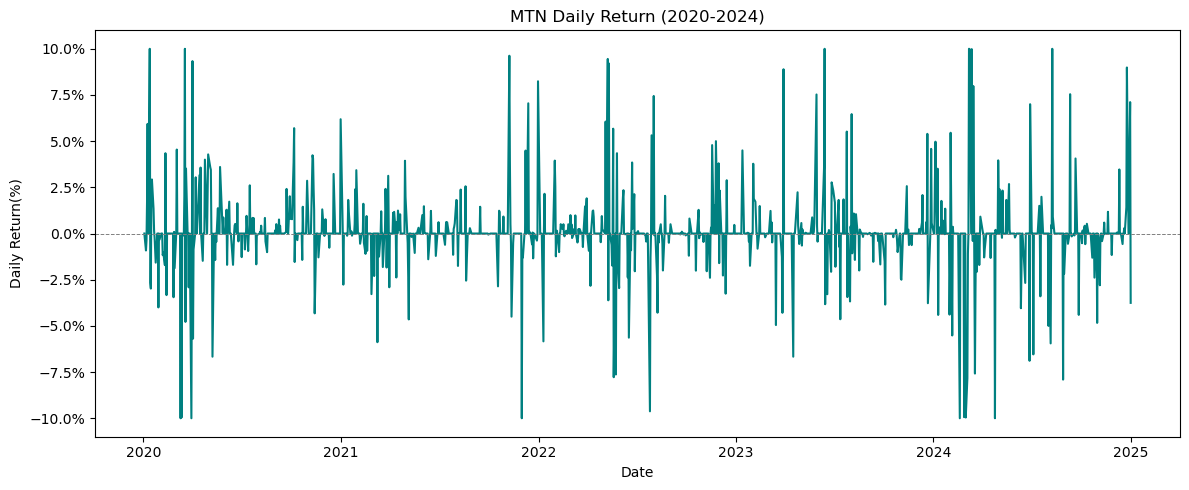

In [82]:
plt.figure(figsize=(12, 5))
plt.plot(MTN_df['Daily Return(%)'].dropna(), label='MTN', color='Teal')
plt.axhline(0,color='Gray',ls='--',lw=0.7)
plt.title('MTN Daily Return (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Daily Return(%)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.savefig("MTN_Daily_Return(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

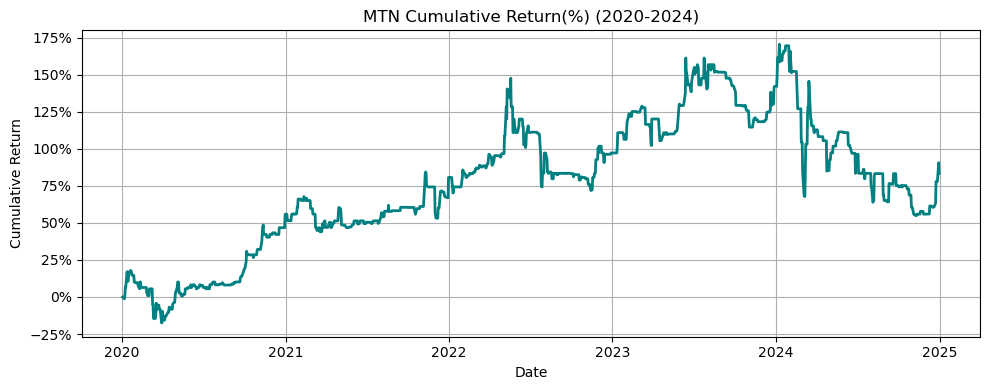

In [83]:

plt.figure(figsize=(10,4))
plt.plot(MTN_df['Cumulative Return(%)'].dropna(), label='MTN', color='Teal',lw=2)
plt.title('MTN Cumulative Return(%) (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid()
plt.tight_layout()
plt.savefig("MTN_Cumulative_Return(%)(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

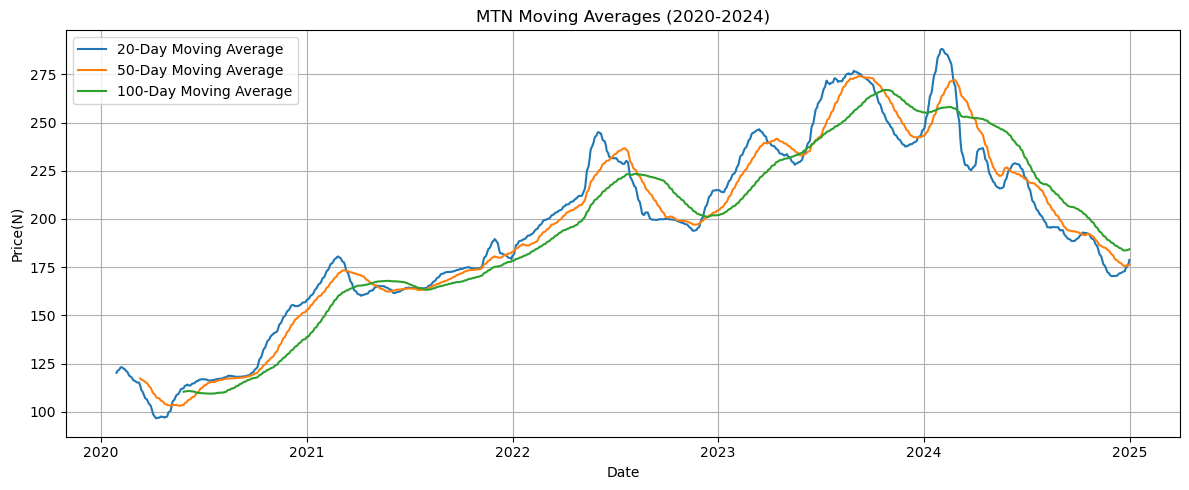

In [84]:

plt.figure(figsize=(12, 5))
plt.plot(MTN_df['20-Day Moving Average'].dropna(),label='20-Day Moving Average')
plt.plot(MTN_df['50-Day Moving Average'].dropna(),label='50-Day Moving Average')
plt.plot(MTN_df['100-Day Moving Average'].dropna(),label='100-Day Moving Average')
plt.title('MTN Moving Averages (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price(N)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("MTN_Moving_Averages(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

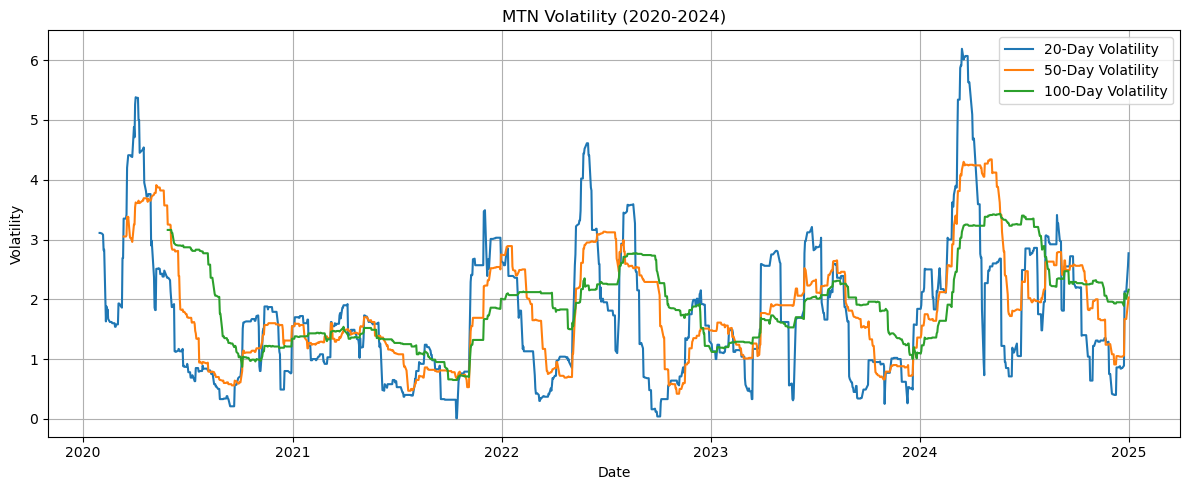

In [86]:
plt.figure(figsize=(12, 5))
plt.plot(MTN_df['20-Day Volatility'].dropna(),label='20-Day Volatility')
plt.plot(MTN_df['50-Day Volatility'].dropna(),label='50-Day Volatility')
plt.plot(MTN_df['100-Day Volatility'].dropna(),label='100-Day Volatility')
plt.title('MTN Volatility (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("MTN_Volatility(2020_2024).png", dpi=300, bbox_inches='tight')
plt.show()

### **MANUFACTURING SECTOR (DANGOTE_CEM)**

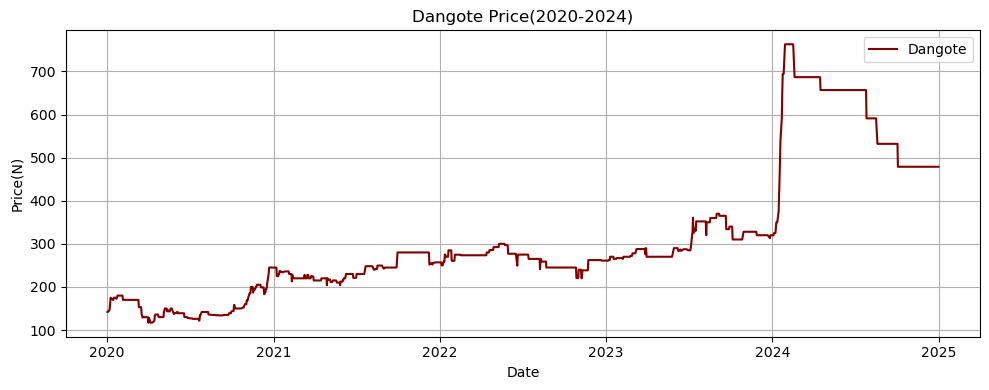

In [87]:
plt.figure(figsize=(10, 4))
plt.plot(dangote_df['Price'], label='Dangote', color='maroon', ls='-')
plt.title('Dangote Price(2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price(N)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("Dangote_Price_(2020_2024).png", dpi=300, bbox_inches='tight')
plt.show()

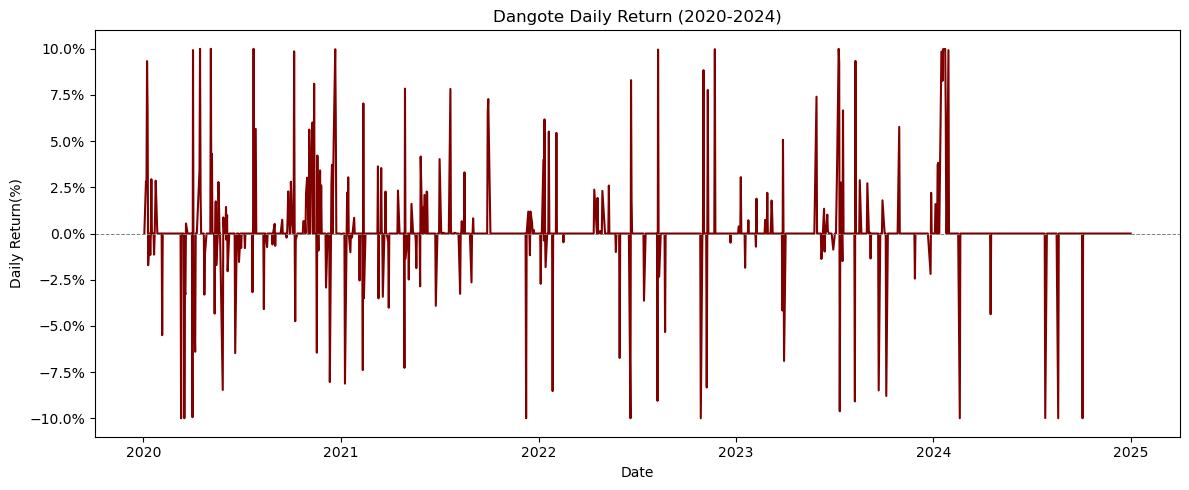

In [88]:
plt.figure(figsize=(12, 5))
plt.plot(dangote_df['Daily Return(%)'].dropna(), label='Dangote', color='maroon')
plt.axhline(0,color='Gray',ls='--',lw=0.7)
plt.title('Dangote Daily Return (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Daily Return(%)')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.savefig("Dangote_Daily_Return(%)_(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

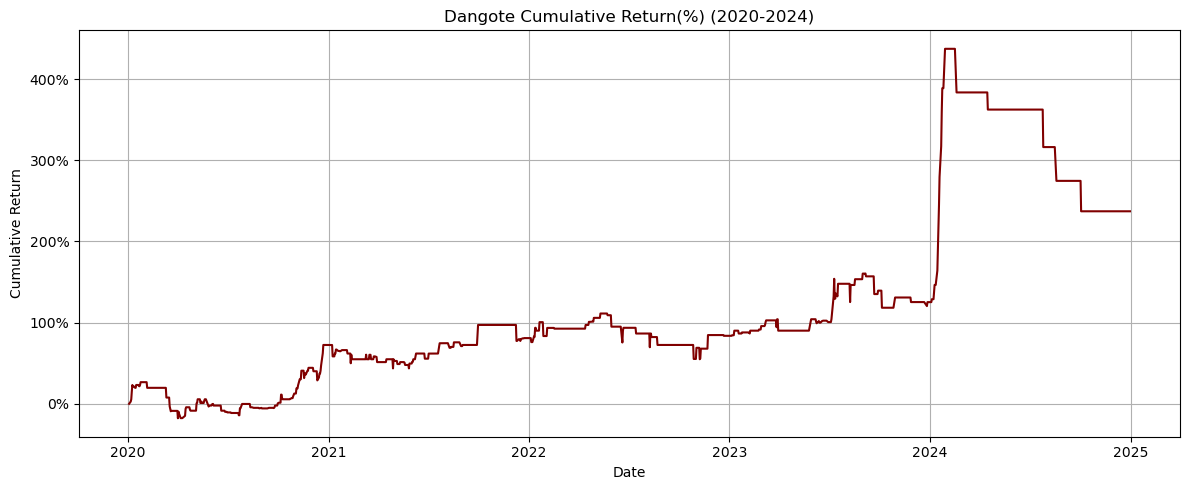

In [89]:
plt.figure(figsize=(12, 5))
plt.plot(dangote_df['Cumulative Return(%)'].dropna(), label='Dangote', color='maroon')
plt.title('Dangote Cumulative Return(%) (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid()
plt.tight_layout()
plt.savefig("Dangote_Cumulative_Return(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

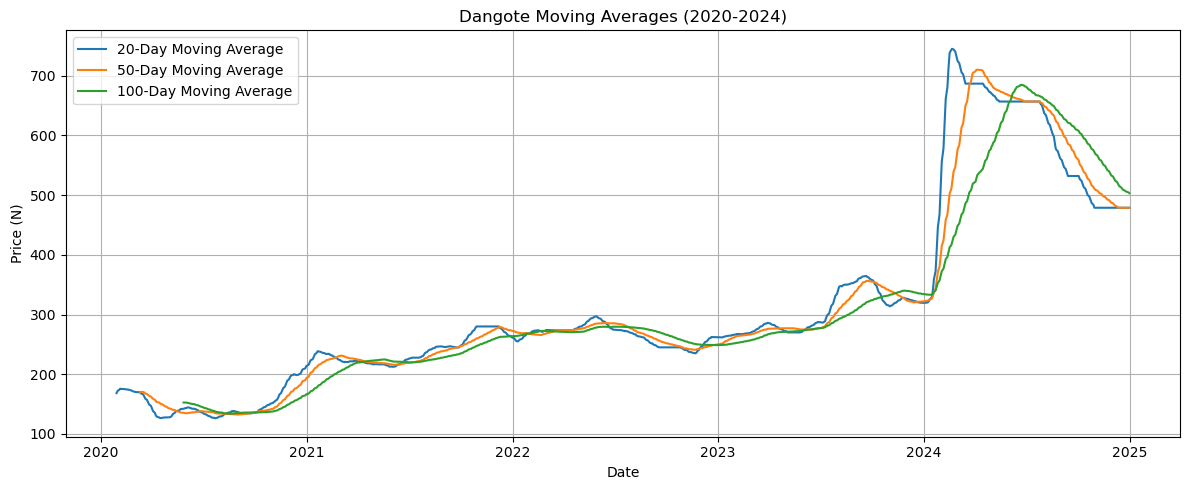

In [90]:
plt.figure(figsize=(12, 5))
plt.plot(dangote_df['20-Day Moving Average'].dropna(),label='20-Day Moving Average')
plt.plot(dangote_df['50-Day Moving Average'].dropna(),label='50-Day Moving Average')
plt.plot(dangote_df['100-Day Moving Average'].dropna(),label='100-Day Moving Average')
plt.title('Dangote Moving Averages (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Price (N)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Dangote_Moving_Averages(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

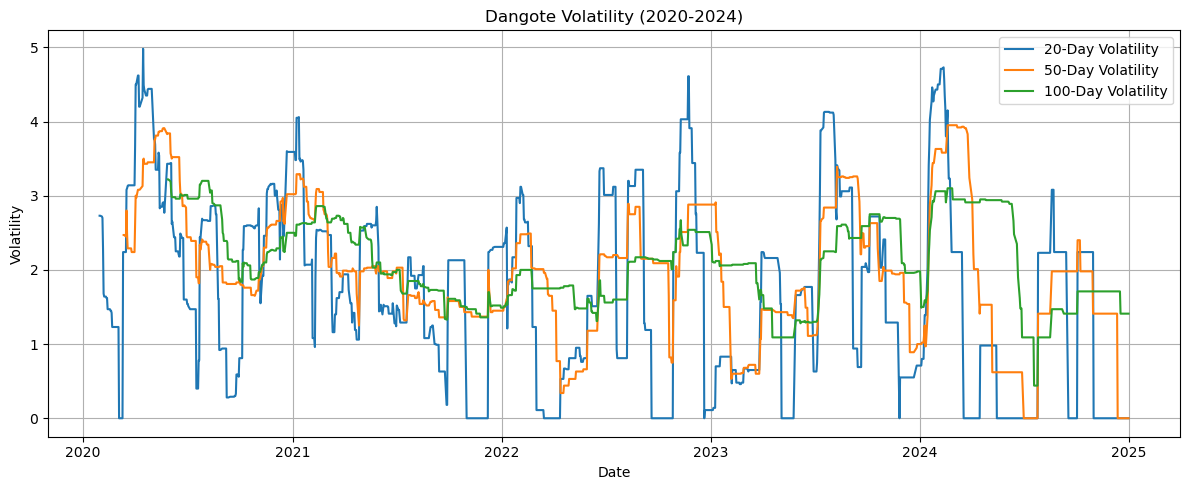

In [91]:
plt.figure(figsize=(12, 5))
plt.plot(dangote_df['20-Day Volatility'].dropna(),label='20-Day Volatility')
plt.plot(dangote_df['50-Day Volatility'].dropna(),label='50-Day Volatility')
plt.plot(dangote_df['100-Day Volatility'].dropna(),label='100-Day Volatility')
plt.title('Dangote Volatility (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("Dangote_Volatility(2020_2024).png", dpi=300, bbox_inches='tight')
plt.show()

### **STOCK PERFORMANCE COMPARISON ACROSS ECONOMIC TIMELINE(2020-2024)**

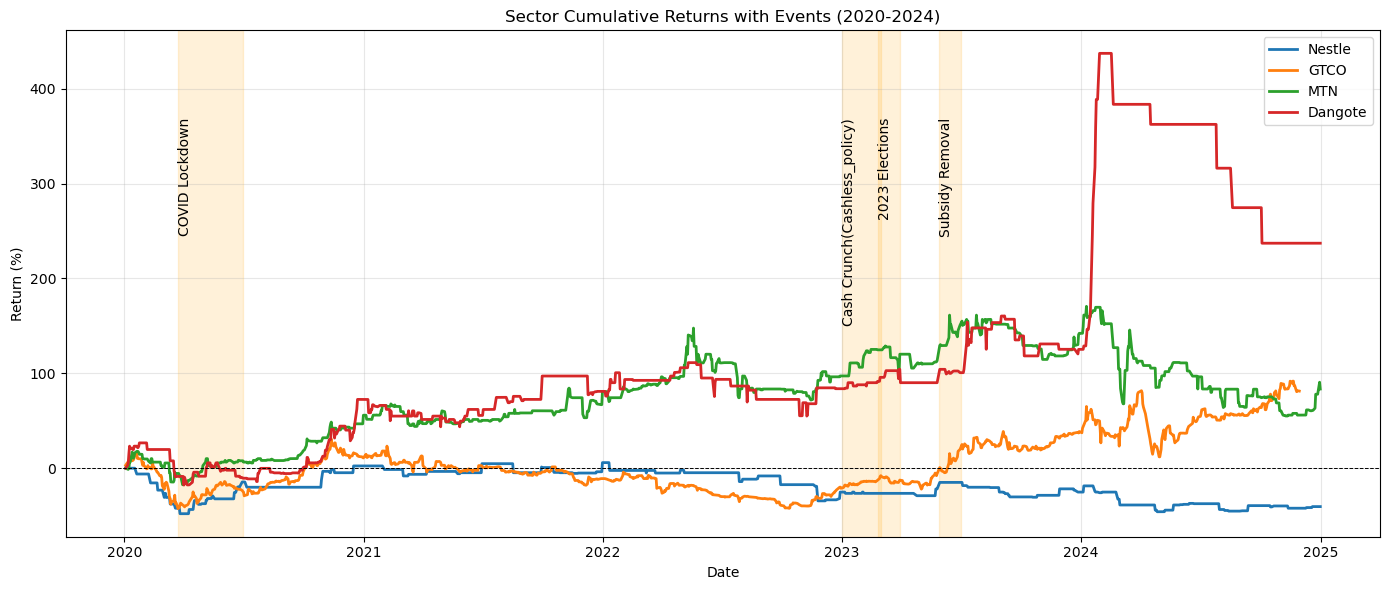

In [100]:
#### CUMULATIVE COMPARISM FOR ALL SECTORS

plt.figure(figsize=(14, 6))
sectors= {
    'Nestle': nestle_df,
    'GTCO': GTCO_df,
    'MTN':MTN_df,
    'Dangote': dangote_df
}

### Plotting all sectors

for name, df in sectors.items():
    plt.plot(df.index, df['Cumulative Return(%)'], label=name, lw=2)

# Adding event ranges

event_ranges = [
    ("COVID Lockdown", "2020-03-23", "2020-06-30"),
    ("Cash Crunch(Cashless_policy)", "2023-01-01", "2023-03-31"), 
    ("2023 Elections", "2023-02-25", "2023-03-01"),
    ("Subsidy Removal", "2023-05-29", "2023-07-01")
]

for label, start, end in event_ranges:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), alpha=0.15, color="orange")
    plt.text(pd.to_datetime(start), plt.ylim()[1]*0.8, label, rotation=90, va="top")

### Formatting

plt.axhline(0, color="black", ls="--", lw=0.7)
plt.title("Sector Cumulative Returns with Events (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.legend(bbox_to_anchor=(1,1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("Sector_Cumulative_Returns_Events(2020_2024)'.png", dpi=300, bbox_inches='tight')
plt.show()

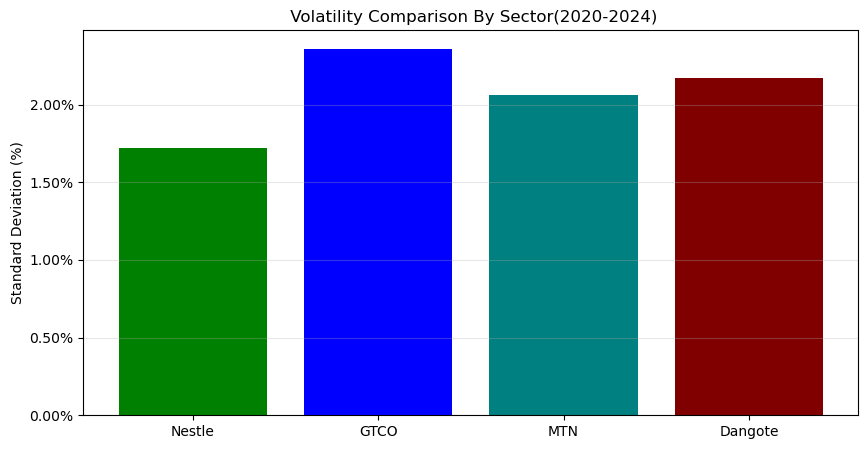

In [111]:
# Daily Returns Volatility 

sectors= {
    'Nestle': nestle_df,
    'GTCO': GTCO_df,
    'MTN':MTN_df,
    'Dangote': dangote_df
}

plt.figure(figsize=(10,5))
plt.bar(['Nestle','GTCO','MTN','Dangote'], 
        [1.72, 2.36, 2.06, 2.17],           # std dev values from .describe
        color=['Green','Blue','Teal','Maroon'])
plt.title(" Volatility Comparison By Sector(2020-2024)")
plt.ylabel("Standard Deviation (%)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.grid(axis='y', alpha=0.3)
plt.savefig("Volatility_Comparison_By_Sector(2020-2024).png", dpi=300, bbox_inches='tight')
plt.show()


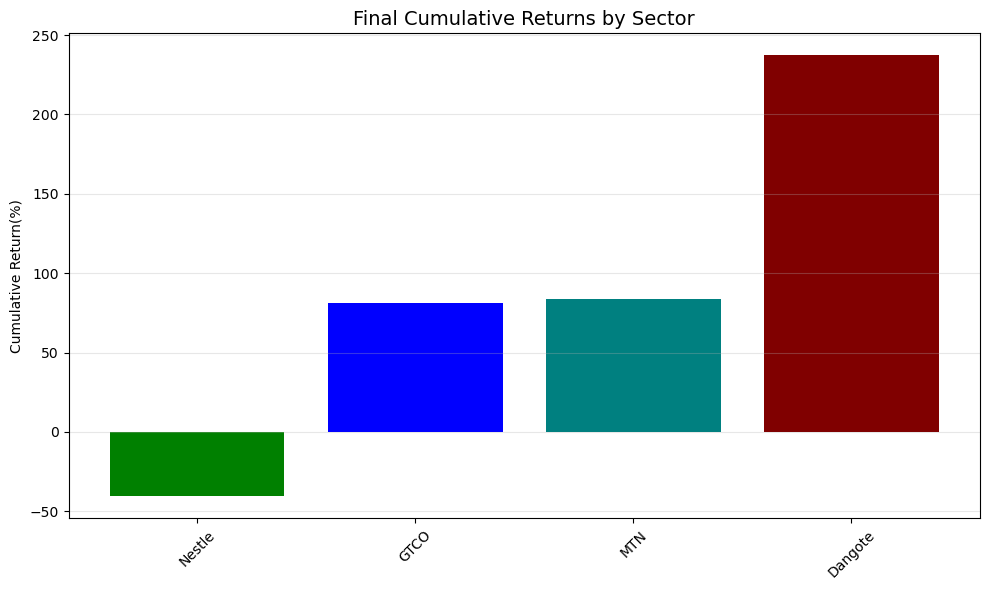

In [99]:
### Final Returns

final_returns = {name: df['Cumulative Return(%)'].iloc[-1] 
                for name, df in sectors.items()}

plt.figure(figsize=(10, 6))
col=["green", "blue","teal", "maroon"] #each column has it's own colour in the bar chart
plt.bar(final_returns.keys(), final_returns.values(), color=col)
plt.title("Final Cumulative Returns by Sector", fontsize=14)
plt.ylabel("Cumulative Return(%)")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig("Final_Cumulative_Return(2020_2024).png", dpi=300, bbox_inches='tight')
plt.show()

